In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Initial Data Exploration and Cleaning
### Data Loading: 
#### Exploring the data structure focusing on review-related information.

### Handling Missing Values:
#### Missing values, especially for critical fields like reviewerName and reviewText, were addressed by identifying records with NaN values and then removing these entries. This was done to ensure all reviews in the dataset contained the necessary information for sentiment, length, and quality analysis.

### Datetime Conversion:
#### The reviewTime column was converted to a datetime format, allowing for time-based analyses such as review frequency, recency, and trends over specified intervals.


In [4]:
#df = pd.read_csv('amazon_review.csv')
df = pd.read_csv('Musical_instruments_reviews.csv')

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [11]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [13]:
# Record with Null values in 'reviewerName' column
df_null_reviewerName = df[df['reviewerName'].isnull()]

In [15]:
df_null_reviewerName.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
41,AA5TINW2RJ195,B000068NW5,NaN,"[0, 0]",Good quality cable and sounds very good,5.0,Five Stars,1405382400,"07 15, 2014"
263,A14VAT5EAX3D9S,B0002CZSJO,NaN,"[0, 0]",It is exactly what you need in a capo! You can...,5.0,Great,1364860800,"04 2, 2013"
264,A2RVY2GDMZHH4,B0002CZSJO,NaN,"[0, 0]",Love these capos and nice that you can get the...,5.0,Always great Kyser,1356652800,"12 28, 2012"
432,A3BMYEA3J6RBVV,B0002CZVB4,NaN,"[0, 0]",Bought it as a gift. Friend loved it very much.,5.0,Friend loved it very much,1405209600,"07 13, 2014"
667,AA5TINW2RJ195,B0002D01K4,NaN,"[0, 0]",At first it look small for my guitar but it fi...,5.0,Love it!,1405382400,"07 15, 2014"


In [17]:
# Record with Null values in 'reviewText' column
df_null_reviewText = df[df['reviewText'].isnull()]

In [19]:
df_null_reviewText.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
2927,AF7AQHLX1UV1Z,B0002H0H4A,Smoothbassman,"[101, 105]",NaN,5.0,The Pop Rocks with the Yeti,1342656000,"07 19, 2012"
4401,AU3GYRAKBUAEU,B000CD1R7K,Jon Norris,"[189, 192]",NaN,4.0,great foot rest,1258416000,"11 17, 2009"
8739,A3N93PUHEMQU34,B004OU2IQG,"L. Su ""Flying train""","[3, 3]",NaN,5.0,To make you sound like a pro,1388102400,"12 27, 2013"
9175,AMEZJVXMSEPY0,B005FKF1PY,M. Luke,"[1, 1]",NaN,5.0,Mini tech for musicians,1319500800,"10 25, 2011"
9306,A3ABAA36CZVYNX,B005M0TKL8,Dave,"[31, 32]",NaN,5.0,"No power = No Sound, But It Sounds GREAT!",1342569600,"07 18, 2012"


In [21]:
df = df.dropna() # Dropping Null Values

In [23]:
df.isnull().sum() ## No null values

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [25]:
# Converting 'reviewTime' to date time
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [27]:
# Finding the latest date
date_max = df['reviewTime'].max()

In [29]:
# Getting the date 3 months behind from the latest date 
latest_3months = date_max - pd.DateOffset(months=3)

In [31]:
df_latest_3months = df[df['reviewTime'] >= latest_3months]

In [33]:
### This df only contains information of the last 3 months
df_latest_3months.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
11,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22
43,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28
54,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13
59,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05
78,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10


In [35]:
df_latest_3months['helpful'].value_counts()

helpful
[0, 0]     840
[1, 1]      62
[0, 1]      22
[2, 2]      16
[1, 2]       6
[3, 3]       4
[0, 2]       2
[3, 5]       1
[0, 3]       1
[4, 4]       1
[7, 7]       1
[8, 10]      1
Name: count, dtype: int64

In [37]:
# Grouping by 'reviewerID' and counting the total purchase inthe last 3 months
purchase_per_reviewer = df_latest_3months.groupby(['reviewerID']).size().reset_index(name='count')

In [39]:
# Ordering ascending 
purchase_per_reviewer = purchase_per_reviewer.sort_values(by='count', ascending=False).reset_index(drop=True)

In [41]:
# This df contain the final purchase count per reviewer
purchase_per_reviewer.head()

,reviewerID,count
0,A26SN2CVQM4FKM,21
1,A20TFY5J3WNJU2,15
2,A164BJ2NU1NSJZ,13
3,A362IZKSMV6MA8,11
4,A3H4PZB9PGMWAA,11


## Reviewers Categories Badges
- +50 = Diamond
- 21-49 = Gold
- 6-20 =  Silver
- 1-5 = Bronze 

In [44]:
# Function that takes the number of purchases and assign a badge category
def badged(count):
    if count > 50:
        return 'Diamond'
    elif 21 <= count <= 49:
        return 'Gold'
    elif 6 <= count <= 20:
        return 'Silver'
    elif 1 <= count <= 5:
        return 'Bronze'
    else:
        return 'No Badge'

In [46]:
# Applying the function to create a new column called 'reviewerBadged'
purchase_per_reviewer['reviewerBadged'] = purchase_per_reviewer['count'].apply(badged)

In [48]:
purchase_per_reviewer.head()

,reviewerID,count,reviewerBadged
0,A26SN2CVQM4FKM,21,Gold
1,A20TFY5J3WNJU2,15,Silver
2,A164BJ2NU1NSJZ,13,Silver
3,A362IZKSMV6MA8,11,Silver
4,A3H4PZB9PGMWAA,11,Silver


## Merge between 'purchase_per_reviewer' and 'df_latest_3months', to add 'reviewerBadged' in our dataframe (df_latest_3months)

In [51]:
# Merge based on 'reviewerID'
df_latest_3months = df_latest_3months.merge(
    purchase_per_reviewer[['reviewerID', 'reviewerBadged']],
    on='reviewerID',
    how='left'
)

In [53]:
df_latest_3months.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze


In [55]:
df_latest_3months['reviewerBadged'].value_counts()

reviewerBadged
Bronze    706
Silver    230
Gold       21
Name: count, dtype: int64

## Export df 50 records as csv 

In [58]:
cols = ['reviewerID','asin','reviewText','overall','reviewTime','reviewerBadged']

In [60]:
csv_to_export = df_latest_3months[cols].head(50)

In [62]:
# Export df as a CSV
csv_to_export.to_csv('df_latest_3months.csv', index=False)

## Feature Engineering – Helpful Votes and Reviewer Badge

### Helpful Votes Extraction:
#### The helpful column represents helpful votes as [X, Y], where X is helpful votes and Y is total votes. We parsed it to create two new columns: helpful_votes and total_votes.
#### Separating them into their own columns provides a better breakdown of review helpfulness for each review. It also allowed us to calculate helpfulness ratios and overall reviewer impact. 

### Helpfulness Score Calculation:
#### The helpfulness_ratio (helpful votes / total votes) column was calculated for each review to gauge how impactful each review was to potential buyers.
#### The average_helpfulness_score for each reviewer was then calculated by averaging helpfulness_ratio across their reviews, offering insight into a reviewer’s overall helpfulness.

### Reviewer Badging:
#### Engineered a  reviewerBadged feature to categorize reviewers based on their cumulative helpful_votes count, with badges (Diamond, Gold, Silver, and Bronze)
#### This badge system incentivizes high-quality, impactful reviewers by providing a visual representation of their review helpfulness.

## probably don't need this markdown

## Attempting to use a different metric to engineer the ReviewerBadged column. 
#### This approach uses the 'helpful' column to assign a Reviewer Badge. I am still working with the thresholds but I think using the 'helpful' column is a more logical approach to assigning badges to reviewers.

In [66]:
#define the extract_helpful_votes function if not already defined
def extract_helpful_votes(helpful_entry):
    try:
        #use eval to convert the string to a list and handle cases where the entry is missing or malformed
        votes = eval(helpful_entry)
        if isinstance(votes, list) and len(votes) == 2:
            return votes
        else:
            return [0, 0]  # Default to [0, 0] if format is incorrect
    except:
        return [0, 0]  # Handle exceptions (e.g., if eval fails)

In [68]:
#work on a copy of df_latest_3months to avoid SettingWithCopyWarning
df_latest_3months_copy = df_latest_3months.copy()

#apply the extraction function and split into columns with error handling
df_latest_3months_copy[['helpful_votes', 'total_votes']] = df_latest_3months_copy['helpful'].apply(extract_helpful_votes).apply(pd.Series)

#convert columns to integers, filling any NaNs with 0
df_latest_3months_copy['helpful_votes'] = df_latest_3months_copy['helpful_votes'].fillna(0).astype(int)
df_latest_3months_copy['total_votes'] = df_latest_3months_copy['total_votes'].fillna(0).astype(int)

#aggregate helpful votes per reviewer
purchase_per_reviewer = df_latest_3months_copy.groupby('reviewerID')['helpful_votes'].sum().reset_index()

#define the badging function
def helpful_badged(helpful_votes):
    if helpful_votes > 50:
        return 'Diamond'
    elif 40 <= helpful_votes <=49:
        return 'Platinum'
    elif 21 <= helpful_votes <= 39:
        return 'Gold'
    elif 6 <= helpful_votes <= 20:
        return 'Silver'
    elif 1 <= helpful_votes <= 5:
        return 'Bronze'
    else:
        return 'No Badge'

#apply the badge function
purchase_per_reviewer['reviewerBadged'] = purchase_per_reviewer['helpful_votes'].apply(helpful_badged)

In [70]:
purchase_per_reviewer.head()

,reviewerID,helpful_votes,reviewerBadged
0,A136IQFGB01KQB,0,No Badge
1,A13NZBZQ7ZZG5O,0,No Badge
2,A146H4KN4LFR60,2,Bronze
3,A14B2YH83ZXMPP,0,No Badge
4,A14FNPHPBHTMO4,0,No Badge


In [72]:
#check value counts of badged reviewers
purchase_per_reviewer['reviewerBadged'].value_counts()

reviewerBadged
No Badge    275
Bronze       74
Silver        2
Name: count, dtype: int64

### Engineering a feature to calculate the Helpfulness Ratio for Each Review

In [75]:
#calculate helpfulness ratio for each review, handling cases with zero total votes
df_latest_3months_copy['helpfulness_ratio'] = df_latest_3months_copy.apply(
    lambda x: x['helpful_votes'] / x['total_votes'] if x['total_votes'] > 0 else 0,
    axis=1
)

In [77]:
#group by reviewerID and calculate the average helpfulness ratio
average_helpfulness = df_latest_3months_copy.groupby('reviewerID')['helpfulness_ratio'].mean().reset_index()
average_helpfulness.rename(columns={'helpfulness_ratio': 'average_helpfulness_score'}, inplace=True)

In [79]:
#merge the average helpfulness score back to the main dataset if needed
df_latest_3months_copy = df_latest_3months_copy.merge(average_helpfulness, on='reviewerID', how='left')

In [81]:
df_latest_3months_copy.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged,helpful_votes,total_votes,helpfulness_ratio,average_helpfulness_score
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,0,0,0.0,0.0
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,0,0,0.0,0.0
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,0,0,0.0,0.0
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,0,0,0.0,0.0
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,0,0,0.0,0.0


In [83]:
helpful_cols = ['helpful_votes', 'total_votes', 'helpfulness_ratio', 'average_helpfulness_score']

df_latest_3months_copy['average_helpfulness_score'].value_counts()

average_helpfulness_score
0.000000    685
0.333333     42
1.000000     24
0.250000     22
0.500000     22
0.047619     21
0.200000     20
0.666667     18
0.111111     18
0.125000     16
0.076923     13
0.090909     11
0.100000     10
0.166667      9
0.142857      7
0.071429      7
0.300000      5
0.750000      4
0.900000      2
0.600000      1
Name: count, dtype: int64

### Adding functionality to the average_helpfulness_score to assign a reliability tag.

In [86]:
#define thresholds and labels for reviewer quality
def label_reviewer_quality(score):
    if score >= 0.75:
        return 'Highly Reliable'
    elif 0.5 <= score < 0.75:
        return 'Reliable'
    elif 0.1 <= score < 0.5:
        return 'Moderate'
    else:
        return 'Low Quality'

#apply the function to create the reviewer_quality column
average_helpfulness['reviewer_quality'] = average_helpfulness['average_helpfulness_score'].apply(label_reviewer_quality)

In [88]:
average_helpfulness.head(50)

,reviewerID,average_helpfulness_score,reviewer_quality
0,A136IQFGB01KQB,0.000000,Low Quality
1,A13NZBZQ7ZZG5O,0.000000,Low Quality
2,A146H4KN4LFR60,0.250000,Moderate
3,A14B2YH83ZXMPP,0.000000,Low Quality
4,A14FNPHPBHTMO4,0.000000,Low Quality
5,A14JBDSWKPKTZA,0.333333,Moderate
6,A14Z9LAETO21KL,0.500000,Reliable
7,A151EUL2C4GJNE,0.000000,Low Quality
8,A158NXQZK3SZ9N,0.000000,Low Quality
9,A15N5RY4YGRQRQ,0.000000,Low Quality


In [90]:
#merge the average helpfulness scores and quality labels into the copied dataframe
df_latest_3months_copy = df_latest_3months_copy.merge(
    average_helpfulness[['reviewerID', 'average_helpfulness_score', 'reviewer_quality']],
    on='reviewerID',
    how='left'
)

In [92]:
#merge the reviewerBadged column from purchase_per_reviewer into df_latest_3months_copy
df_latest_3months_copy = df_latest_3months_copy.merge(
    purchase_per_reviewer[['reviewerID', 'reviewerBadged']],
    on='reviewerID',
    how='left'
)

In [94]:
df_latest_3months_copy.head(50)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,helpful_votes,total_votes,helpfulness_ratio,average_helpfulness_score_x,average_helpfulness_score_y,reviewer_quality,reviewerBadged_y
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
5,A1S8R9OAIQT7YI,B000068NW5,patriotsarebest,"[0, 0]",Only complaint is the size which is my fault. ...,4.0,Only complaint is the size which is my fault. ...,1403913600,2014-06-28,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
6,A3NGAQKJ6X088B,B000068NW5,"R. Beckmeyer ""Positively Positive""","[0, 0]","very sturdy, high quality with little to no fe...",5.0,"works well, great quality",1402876800,2014-06-16,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
7,A2RS66Y79Q8X0W,B000068NZG,"Rexomus ""One man with courage makes a majority.""","[0, 0]",I use this cable to run a extra line from micr...,5.0,Good adapter cable,1400716800,2014-05-22,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
8,AJ3MI4QT7339J,B000068O3X,"Greg Runyon ""Loves Amazon""","[0, 0]",exactly what I needed to connect 2 distortion ...,5.0,"good product, still use it, hassle-free order",1403913600,2014-06-28,Bronze,0,0,0.0,0.000000,0.000000,Low Quality,No Badge
9,A22LLQ00V32YZJ,B000068O3X,jim beasley jr,"[0, 0]","these cable came super fast in the mail, They ...",4.0,just what you pay for,1399334400,2014-05-06,Silver,0,0,0.0,0.000000,0.000000,Low Quality,No Badge


In [175]:
#create truncated dataframe for export
mark_csv = df_latest_3months_copy.head(50)

In [177]:
#export to csv
mark_csv.to_csv('updated_df_latest_3months.csv', index=False)

## Sentiment Analysis and Consistency Evaluation

### Sentiment Clustering:
#### Instead of traditional sentiment analysis models, a clustering approach was applied to categorize reviews into sentiment groups. By vectorizing reviewText and clustering it into two groups, each review was labeled with a sentiment cluster, indicating a general positive or negative tone.
#### Using SKLearn's tfid vectorizer, PCA, and KMeans to vectorize the text data and reduce data with PCA. Then use KMeans to cluster reviews that share the same sentiment.

### Sentiment Analysis Using VADER Library
#### Tried using VADER to evaluate each review’s sentiment, providing a numerical sentiment_score for each review. This compound score ranges from -1 to +1:

##### Positive sentiment: Scores closer to +1 indicate positive feedback.
##### Negative sentiment: Scores closer to -1 indicate negative feedback.
##### Neutral sentiment: Scores around 0 suggest neutrality.

### Calculating Sentiment Consistency:
#### After calculating each review’s sentiment_score, the standard deviation of scores per reviewer was calculated as sentiment_variability.
#### This indicates sentiment stability, where low variability suggests a consistent tone, and high variability suggests shifts in sentiment.

### Labeling Reviewers by Sentiment Consistency:
#### Based on sentiment_variability, reviewers were labeled as “Consistent”, “Moderately Consistent”, or “Inconsistent”
#### These labels help identify reliable reviewers (with consistent sentiment) vs. those with fluctuating tones, which might signal trolling or unreliable feedback.

### Sentiment Consistency Analysis:
#### For each reviewer, the sentiment_variability was calculated as the standard deviation of their sentiment scores. This allowed us to assess whether a reviewer maintained a consistent tone across reviews or exhibited erratic sentiment changes, which could potentially indicate unreliable or trolling behavior
#### A consistency_label was applied based on sentiment_variability, with thresholds for “Consistent,” “Moderately Consistent,” and “Inconsistent.”


In [96]:
#initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=500)

#apply vectorizer to review text
tfidf_matrix = vectorizer.fit_transform(df_latest_3months_copy['reviewText'].fillna(''))

In [98]:
#reduce TF-IDF features to 10 principal components
pca = PCA(n_components=10)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

In [100]:
#use KMeans to identify clusters, setting k=2 for positive/negative tones
kmeans = KMeans(n_clusters=2, random_state=42)
df_latest_3months_copy['sentiment_cluster'] = kmeans.fit_predict(reduced_tfidf)

In [102]:
#clculate the proportion of each cluster for each reviewer
reviewer_sentiment = df_latest_3months_copy.groupby('reviewerID')['sentiment_cluster'].agg(['mean', 'std']).reset_index()
reviewer_sentiment.rename(columns={'mean': 'sentiment_mean', 'std': 'sentiment_variability'}, inplace=True)

In [104]:
#merge sentiment consistency with main dataframe
df_latest_3months_copy = df_latest_3months_copy.merge(reviewer_sentiment[['reviewerID', 'sentiment_variability']], on='reviewerID', how='left')

In [106]:
reviewer_sentiment.head()

,reviewerID,sentiment_mean,sentiment_variability
0,A136IQFGB01KQB,1.0,0.000000
1,A13NZBZQ7ZZG5O,1.0,NaN
2,A146H4KN4LFR60,0.0,0.000000
3,A14B2YH83ZXMPP,0.0,0.000000
4,A14FNPHPBHTMO4,0.6,0.547723


In [108]:
reviewer_sentiment.isnull().sum()

reviewerID                 0
sentiment_mean             0
sentiment_variability    140
dtype: int64

In [110]:
#replace NaN values in sentiment_variability with 0 to indicate no variability
reviewer_sentiment['sentiment_variability'].fillna(0, inplace=True)

/var/folders/c0/j924rzh55870lw4v2cr6s18w0000gn/T/ipykernel_73823/10997689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviewer_sentiment['sentiment_variability'].fillna(0, inplace=True)


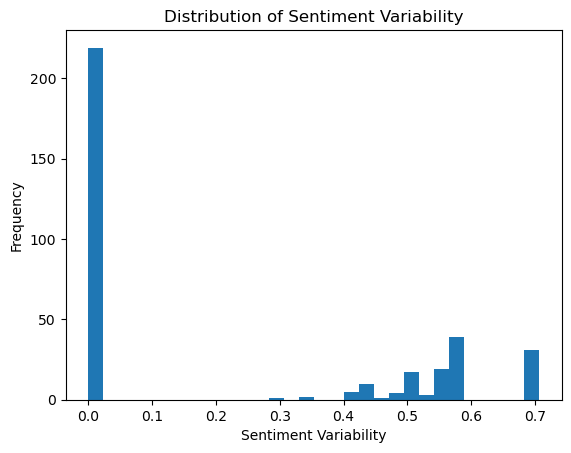

In [112]:
#plot distribution of sentiment_variability to identify natural breaks
plt.hist(reviewer_sentiment['sentiment_variability'].dropna(), bins=30)
plt.xlabel('Sentiment Variability')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Variability')
plt.show()

In [114]:
#define function for labeling based on variability thresholds
def label_consistency(variability):
    if variability <= 0.2:
        return 'Consistent'
    elif 0.2 < variability <= 0.5:
        return 'Moderately Consistent'
    else:
        return 'Inconsistent'

#apply the function to sentiment_variability column
reviewer_sentiment['consistency_label'] = reviewer_sentiment['sentiment_variability'].apply(label_consistency)

In [116]:
#merge consistency labels into the main dataframe
df_latest_3months_copy = df_latest_3months_copy.merge(
    reviewer_sentiment[['reviewerID', 'consistency_label']],
    on='reviewerID',
    how='left'
)

In [118]:
df_latest_3months_copy.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,helpful_votes,total_votes,helpfulness_ratio,average_helpfulness_score_x,average_helpfulness_score_y,reviewer_quality,reviewerBadged_y,sentiment_cluster,sentiment_variability,consistency_label
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,0,0,0.0,0.0,0.0,Low Quality,No Badge,1,0.707107,Inconsistent
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,0,0,0.0,0.0,0.0,Low Quality,No Badge,1,0.447214,Moderately Consistent
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,0,0,0.0,0.0,0.0,Low Quality,No Badge,0,NaN,Consistent
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,0,0,0.0,0.0,0.0,Low Quality,No Badge,1,NaN,Consistent
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,0,0,0.0,0.0,0.0,Low Quality,No Badge,0,0.577350,Inconsistent


### VADER (Valence Aware Dictionary and sEntiment Reasoner) is a good tool to analyze reviews. Sentiment scores range from -1 to 1 where 1 = highly positive sentiment and -1 is highly negative. 0 is neutral. 

In [122]:
#!pip install vaderSentiment

In [124]:
#initialize the vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#define a function to calculate sentiment score
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'] 

#apply the sentiment function to each review
df_latest_3months_copy['sentiment_score'] = df_latest_3months_copy['reviewText'].apply(lambda x: get_sentiment_score(str(x)))

In [126]:
#calculate the standard deviation of sentiment scores per reviewer
sentiment_consistency = df_latest_3months_copy.groupby('reviewerID')['sentiment_score'].std().reset_index()
sentiment_consistency.rename(columns={'sentiment_score': 'sentiment_std_dev'}, inplace=True)

In [130]:
sentiment_consistency.head()

,reviewerID,sentiment_std_dev
0,A136IQFGB01KQB,1.197697
1,A13NZBZQ7ZZG5O,NaN
2,A146H4KN4LFR60,0.074186
3,A14B2YH83ZXMPP,0.534121
4,A14FNPHPBHTMO4,0.208494


In [132]:
#copy dataframe to test merging vader sentinment analysis columns to main dataframe. 
experimental_df = df_latest_3months_copy.copy()

In [134]:
#merge sentiment consistency back into the main dataframe
experimental_df = experimental_df.merge(sentiment_consistency, on='reviewerID', how='left')

In [136]:
#define a threshold for sentiment consistency
def flag_inconsistent_reviewer(std_dev):
    return 'Inconsistent' if std_dev > 0.5 else 'Consistent'

#apply the flag
experimental_df['sentiment_consistency_flag'] = experimental_df['sentiment_std_dev'].apply(flag_inconsistent_reviewer)

In [138]:
experimental_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,average_helpfulness_score_x,average_helpfulness_score_y,reviewer_quality,reviewerBadged_y,sentiment_cluster,sentiment_variability,consistency_label,sentiment_score,sentiment_std_dev,sentiment_consistency_flag
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,0.0,0.0,Low Quality,No Badge,1,0.707107,Inconsistent,0.2724,0.118794,Consistent
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,0.0,0.0,Low Quality,No Badge,1,0.447214,Moderately Consistent,0.6486,0.125245,Consistent
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0.0,0.0,Low Quality,No Badge,0,NaN,Consistent,0.8604,NaN,Consistent
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,0.0,0.0,Low Quality,No Badge,1,NaN,Consistent,-0.2924,NaN,Consistent
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0.0,0.0,Low Quality,No Badge,0,0.577350,Inconsistent,0.1280,0.321706,Consistent


## Review Length Consistency

### Review Length Calculation:
#### Review length was measured in both characters and words, providing two new columns, review_length_characters and review_length_words.
#### These features allowed us to understand each reviewer’s writing style and assess the depth or brevity of reviews.

### Length Consistency Analysis:
#### For each reviewer, the average and variance in review length were calculated in terms of both characters and words. Reviewers with high length variability may indicate irregularity in review quality, whereas low variance implies consistency and potentially genuine feedback.

In [140]:
#calculate the character length of each review
df_latest_3months_copy['review_length_characters'] = df_latest_3months_copy['reviewText'].apply(lambda x: len(str(x)))

In [142]:
#calculate the word count of each review
df_latest_3months_copy['review_length_words'] = df_latest_3months_copy['reviewText'].apply(lambda x: len(str(x).split()))

In [144]:
df_latest_3months_copy.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,average_helpfulness_score_x,average_helpfulness_score_y,reviewer_quality,reviewerBadged_y,sentiment_cluster,sentiment_variability,consistency_label,sentiment_score,review_length_characters,review_length_words
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,0.0,0.0,Low Quality,No Badge,1,0.707107,Inconsistent,0.2724,184,43
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,0.0,0.0,Low Quality,No Badge,1,0.447214,Moderately Consistent,0.6486,123,23
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0.0,0.0,Low Quality,No Badge,0,NaN,Consistent,0.8604,160,30
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,0.0,0.0,Low Quality,No Badge,1,NaN,Consistent,-0.2924,120,23
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0.0,0.0,Low Quality,No Badge,0,0.577350,Inconsistent,0.1280,136,25
5,A1S8R9OAIQT7YI,B000068NW5,patriotsarebest,"[0, 0]",Only complaint is the size which is my fault. ...,4.0,Only complaint is the size which is my fault. ...,1403913600,2014-06-28,Bronze,...,0.0,0.0,Low Quality,No Badge,1,0.707107,Inconsistent,-0.5994,111,26
6,A3NGAQKJ6X088B,B000068NW5,"R. Beckmeyer ""Positively Positive""","[0, 0]","very sturdy, high quality with little to no fe...",5.0,"works well, great quality",1402876800,2014-06-16,Bronze,...,0.0,0.0,Low Quality,No Badge,0,0.000000,Consistent,0.7490,113,22
7,A2RS66Y79Q8X0W,B000068NZG,"Rexomus ""One man with courage makes a majority.""","[0, 0]",I use this cable to run a extra line from micr...,5.0,Good adapter cable,1400716800,2014-05-22,Bronze,...,0.0,0.0,Low Quality,No Badge,0,NaN,Consistent,0.8656,339,61
8,AJ3MI4QT7339J,B000068O3X,"Greg Runyon ""Loves Amazon""","[0, 0]",exactly what I needed to connect 2 distortion ...,5.0,"good product, still use it, hassle-free order",1403913600,2014-06-28,Bronze,...,0.0,0.0,Low Quality,No Badge,0,0.577350,Inconsistent,-0.7027,379,63
9,A22LLQ00V32YZJ,B000068O3X,jim beasley jr,"[0, 0]","these cable came super fast in the mail, They ...",4.0,just what you pay for,1399334400,2014-05-06,Silver,...,0.0,0.0,Low Quality,No Badge,0,0.534522,Inconsistent,0.4215,127,23


In [146]:
#group by reviewerID to calculate the average and variance of review length
review_length_stats_chars = df_latest_3months_copy.groupby('reviewerID')['review_length_characters'].agg(['mean', 'std']).reset_index()
review_length_stats_chars.rename(columns={'mean': 'avg_review_length_characters', 'std': 'review_length_variance_characters'}, inplace=True)

In [148]:
#merge review length stats into the main dataframe
df_latest_3months_copy = df_latest_3months_copy.merge(
    review_length_stats_chars,
    on='reviewerID',
    how='left'
)

In [150]:
#group by reviewerID to calculate the average and variance of review length
review_length_stats_words = df_latest_3months_copy.groupby('reviewerID')['review_length_words'].agg(['mean', 'std']).reset_index()
review_length_stats_words.rename(columns={'mean': 'avg_review_length_words', 'std': 'review_length_variance_words'}, inplace=True)

In [152]:
#merge review length stats into the main dataframe
df_latest_3months_copy = df_latest_3months_copy.merge(
    review_length_stats_words,
    on='reviewerID',
    how='left'
)

In [154]:
df_latest_3months_copy.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,sentiment_cluster,sentiment_variability,consistency_label,sentiment_score,review_length_characters,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,1,0.707107,Inconsistent,0.2724,184,43,179.000000,7.071068,39.500000,4.949747
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,1,0.447214,Moderately Consistent,0.6486,123,23,170.400000,63.904616,31.000000,12.903488
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0,NaN,Consistent,0.8604,160,30,160.000000,NaN,30.000000,NaN
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,1,NaN,Consistent,-0.2924,120,23,120.000000,NaN,23.000000,NaN
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0,0.577350,Inconsistent,0.1280,136,25,318.666667,225.712945,58.666667,43.661577


In [156]:
df_latest_3months_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   reviewerID                         957 non-null    object        
 1   asin                               957 non-null    object        
 2   reviewerName                       957 non-null    object        
 3   helpful                            957 non-null    object        
 4   reviewText                         957 non-null    object        
 5   overall                            957 non-null    float64       
 6   summary                            957 non-null    object        
 7   unixReviewTime                     957 non-null    int64         
 8   reviewTime                         957 non-null    datetime64[ns]
 9   reviewerBadged_x                   957 non-null    object        
 10  helpful_votes                      957

### DROP avg_review_length_characters_y and review_length_variance_y

In [163]:
#df_latest = df_latest_3months_copy.drop(['avg_review_length_characters_y', 'review_length_variance_y'], axis=1)

df_latest = df_latest_3months_copy.drop(['reviewerBadged_y'], axis=1)

In [165]:
df_latest.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,sentiment_cluster,sentiment_variability,consistency_label,sentiment_score,review_length_characters,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,1,0.707107,Inconsistent,0.2724,184,43,179.000000,7.071068,39.500000,4.949747
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,1,0.447214,Moderately Consistent,0.6486,123,23,170.400000,63.904616,31.000000,12.903488
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0,NaN,Consistent,0.8604,160,30,160.000000,NaN,30.000000,NaN
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,1,NaN,Consistent,-0.2924,120,23,120.000000,NaN,23.000000,NaN
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0,0.577350,Inconsistent,0.1280,136,25,318.666667,225.712945,58.666667,43.661577


In [167]:
#create new dataframe with dropped columns and renaming redundant column names
df_latest = df_latest.rename(columns={'avg_review_length': 'avg_review_length_words', 'review_length_variance': 'review_length_variance_words'})

In [169]:
df_latest.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,sentiment_cluster,sentiment_variability,consistency_label,sentiment_score,review_length_characters,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,1,0.707107,Inconsistent,0.2724,184,43,179.000000,7.071068,39.500000,4.949747
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,1,0.447214,Moderately Consistent,0.6486,123,23,170.400000,63.904616,31.000000,12.903488
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0,NaN,Consistent,0.8604,160,30,160.000000,NaN,30.000000,NaN
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,1,NaN,Consistent,-0.2924,120,23,120.000000,NaN,23.000000,NaN
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0,0.577350,Inconsistent,0.1280,136,25,318.666667,225.712945,58.666667,43.661577


## Review Frequency Analysis

### Monthly Review Frequency:
#### To identify spam or incentivized behavior, monthly review counts per reviewer were calculated. Both the average number of reviews per month and the variance in review frequency were recorded.
#### By analyzing this data over the last three months, any unusual spikes in posting activity or consistent high-frequency behavior could be flagged for further review.

### Recent Frequency Analysis:
#### The frequency of reviews over the most recent three months was emphasized to capture current patterns and potential shifts in reviewer behavior.

In [171]:
#convert reviewTime to datetime if not already in that format
df_latest['reviewTime'] = pd.to_datetime(df_latest_3months_copy['reviewTime'])

In [173]:
#extract year and month for grouping
df_latest['year_month'] = df_latest['reviewTime'].dt.to_period('M')

In [175]:
#count the number of reviews per reviewer per month
review_frequency = df_latest.groupby(['reviewerID', 'year_month']).size().reset_index(name='monthly_review_count')

In [177]:
#calculate average and variance of monthly review frequency for each reviewer
review_activity_stats = review_frequency.groupby('reviewerID')['monthly_review_count'].agg(['mean', 'std']).reset_index()
review_activity_stats.rename(columns={'mean': 'avg_monthly_reviews', 'std': 'monthly_review_variance'}, inplace=True)

In [179]:
#replace NaN in monthly_review_variance with 0
review_activity_stats['monthly_review_variance'].fillna(0, inplace=True)

/var/folders/c0/j924rzh55870lw4v2cr6s18w0000gn/T/ipykernel_73823/3167988262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  review_activity_stats['monthly_review_variance'].fillna(0, inplace=True)


In [181]:
review_activity_stats.head()

,reviewerID,avg_monthly_reviews,monthly_review_variance
0,A136IQFGB01KQB,1.0,0.000000
1,A13NZBZQ7ZZG5O,1.0,0.000000
2,A146H4KN4LFR60,2.0,1.414214
3,A14B2YH83ZXMPP,2.5,2.121320
4,A14FNPHPBHTMO4,2.5,2.121320


In [183]:
#merge recent frequency stats into the main dataframe
df_latest = df_latest.merge(
    review_activity_stats,
    on='reviewerID',
    how='left'
)

In [185]:
df_latest.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,sentiment_score,review_length_characters,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words,year_month,avg_monthly_reviews,monthly_review_variance
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,0.2724,184,43,179.000000,7.071068,39.500000,4.949747,2014-04,2.0,0.00000
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,0.6486,123,23,170.400000,63.904616,31.000000,12.903488,2014-05,2.5,2.12132
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0.8604,160,30,160.000000,NaN,30.000000,NaN,2014-05,1.0,0.00000
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,-0.2924,120,23,120.000000,NaN,23.000000,NaN,2014-07,1.0,0.00000
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0.1280,136,25,318.666667,225.712945,58.666667,43.661577,2014-07,3.0,0.00000


In [193]:
#filling NaN values
df_latest[['review_length_variance_characters', 'review_length_variance_words']] = df_latest[['review_length_variance_characters', 'review_length_variance_words']].fillna(0)

In [195]:
df_latest.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,sentiment_score,review_length_characters,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words,year_month,avg_monthly_reviews,monthly_review_variance
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,0.2724,184,43,179.000000,7.071068,39.500000,4.949747,2014-04,2.0,0.00000
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,0.6486,123,23,170.400000,63.904616,31.000000,12.903488,2014-05,2.5,2.12132
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,0.8604,160,30,160.000000,0.000000,30.000000,0.000000,2014-05,1.0,0.00000
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,-0.2924,120,23,120.000000,0.000000,23.000000,0.000000,2014-07,1.0,0.00000
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,0.1280,136,25,318.666667,225.712945,58.666667,43.661577,2014-07,3.0,0.00000


In [373]:
mark_csv2 = df_latest.head(50)

In [377]:
mark_csv2.to_csv('updated_df.csv', index=False)

In [197]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   reviewerID                         957 non-null    object        
 1   asin                               957 non-null    object        
 2   reviewerName                       957 non-null    object        
 3   helpful                            957 non-null    object        
 4   reviewText                         957 non-null    object        
 5   overall                            957 non-null    float64       
 6   summary                            957 non-null    object        
 7   unixReviewTime                     957 non-null    int64         
 8   reviewTime                         957 non-null    datetime64[ns]
 9   reviewerBadged_x                   957 non-null    object        
 10  helpful_votes                      957

## Review ID Generation and Metadata Creation

### Review ID Generation:
#### A new reviewID column was added, containing a unique alphanumeric ID for each review. This addition provides a way to for the Software Engineers to reference and track reviews independently within the dataset while building out the backend of the product.

### Metadata Creation:
#### Created a metadata DataFrame that mirrors the length of the df_latest dataframe, containing two new columns:
#### totalCount: This value was requested by the Software Engineers in order to process things in the backend. 
#### lastUpdated: A date primarily matching reviewTime but with 20% of entries set to a randomly selected date within one month after the review date to add variability.
 
##### This is at the request of the SE's

In [200]:
import random
import string

#function to generate a random alphanumeric string
def generate_random_id(length=10):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

#add the 'reviewID' column with a random string for each row
df_latest['reviewID'] = [generate_random_id() for _ in range(len(df_latest))]

In [202]:
df_latest.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,review_length_characters,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words,year_month,avg_monthly_reviews,monthly_review_variance,reviewID
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,184,43,179.000000,7.071068,39.500000,4.949747,2014-04,2.0,0.00000,YF6Blmp2Vk
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,123,23,170.400000,63.904616,31.000000,12.903488,2014-05,2.5,2.12132,MAHPYeEs9Q
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,160,30,160.000000,0.000000,30.000000,0.000000,2014-05,1.0,0.00000,bIbu1NULeP
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,120,23,120.000000,0.000000,23.000000,0.000000,2014-07,1.0,0.00000,1ONfdJwqlS
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,136,25,318.666667,225.712945,58.666667,43.661577,2014-07,3.0,0.00000,s6TUjFzIBe


In [204]:
import numpy as np

#define the probability distribution for verified status
#65% verified (1), 35% not verified (0)
probability_distribution = [0.65, 0.35]  

#add the "verified" column with random values based on the distribution
df_latest['verified'] = np.random.choice([1, 0], size=len(df_latest), p=probability_distribution)

In [210]:
df_latest.head(50)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewerBadged_x,...,review_length_words,avg_review_length_characters,review_length_variance_characters,avg_review_length_words,review_length_variance_words,year_month,avg_monthly_reviews,monthly_review_variance,reviewID,verified
0,A35QFQI0M46LWO,B00005ML71,Christopher C,"[0, 0]",I got it to have it if I needed it. I have fou...,4.0,It works great but I hardly use it.,1398124800,2014-04-22,Bronze,...,43,179.000000,7.071068,39.500000,4.949747,2014-04,2.000000,0.000000,YF6Blmp2Vk,1
1,A3W2E6S24BTXXK,B000068NW5,"airchamp ""ariel""","[0, 0]",Realtively inexpensive patch cable for electri...,5.0,very nice cable,1401235200,2014-05-28,Bronze,...,23,170.400000,63.904616,31.000000,12.903488,2014-05,2.500000,2.121320,MAHPYeEs9Q,0
2,A2JK2ITE138P7Z,B000068NW5,Dr. Marc,"[0, 0]",I have found Hosa cables to be an excellent va...,5.0,Nice cable for the price,1399939200,2014-05-13,Bronze,...,30,160.000000,0.000000,30.000000,0.000000,2014-05,1.000000,0.000000,bIbu1NULeP,1
3,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,2014-07-05,Bronze,...,23,120.000000,0.000000,23.000000,0.000000,2014-07,1.000000,0.000000,1ONfdJwqlS,1
4,A1A15ECLHM9BQY,B000068NW5,Nick,"[0, 0]","Hosa makes good stuff, this is no exception. I...",5.0,Excellent,1404950400,2014-07-10,Bronze,...,25,318.666667,225.712945,58.666667,43.661577,2014-07,3.000000,0.000000,s6TUjFzIBe,1
5,A1S8R9OAIQT7YI,B000068NW5,patriotsarebest,"[0, 0]",Only complaint is the size which is my fault. ...,4.0,Only complaint is the size which is my fault. ...,1403913600,2014-06-28,Bronze,...,26,279.000000,237.587878,58.500000,45.961941,2014-06,2.000000,0.000000,9QnpUtqzM1,1
6,A3NGAQKJ6X088B,B000068NW5,"R. Beckmeyer ""Positively Positive""","[0, 0]","very sturdy, high quality with little to no fe...",5.0,"works well, great quality",1402876800,2014-06-16,Bronze,...,22,121.000000,12.027746,22.750000,3.593976,2014-06,4.000000,0.000000,KsImtJb3M9,1
7,A2RS66Y79Q8X0W,B000068NZG,"Rexomus ""One man with courage makes a majority.""","[0, 0]",I use this cable to run a extra line from micr...,5.0,Good adapter cable,1400716800,2014-05-22,Bronze,...,61,339.000000,0.000000,61.000000,0.000000,2014-05,1.000000,0.000000,CmiqlZc8IH,1
8,AJ3MI4QT7339J,B000068O3X,"Greg Runyon ""Loves Amazon""","[0, 0]",exactly what I needed to connect 2 distortion ...,5.0,"good product, still use it, hassle-free order",1403913600,2014-06-28,Bronze,...,63,245.333333,118.323004,42.333333,17.925773,2014-06,1.500000,0.707107,OVe429U0XD,0
9,A22LLQ00V32YZJ,B000068O3X,jim beasley jr,"[0, 0]","these cable came super fast in the mail, They ...",4.0,just what you pay for,1399334400,2014-05-06,Silver,...,23,185.571429,94.047607,37.428571,20.646688,2014-05,2.333333,1.527525,gl1kzhg0KQ,0


In [226]:
import sys
sys.setrecursionlimit(3000)

In [234]:
#cast year_month as dtype str
df_latest['year_month'] = df_latest['year_month'].astype(str)

In [236]:
df_to_json = df_latest.head(50)

In [238]:
#convert df_latest to JSON format and save it to a file
df_to_json.to_json("df_latest.json", orient='records', lines=True)

In [218]:
df_latest.dtypes

reviewerID                                   object
asin                                         object
reviewerName                                 object
helpful                                      object
reviewText                                   object
overall                                     float64
summary                                      object
unixReviewTime                                int64
reviewTime                           datetime64[ns]
reviewerBadged_x                             object
helpful_votes                                 int64
total_votes                                   int64
helpfulness_ratio                           float64
average_helpfulness_score_x                 float64
average_helpfulness_score_y                 float64
reviewer_quality                             object
sentiment_cluster                             int32
sentiment_variability                       float64
consistency_label                            object
sentiment_sc

### Creating a metadata dataframe that consists of totalCount and lastUpdated.
#### I created the dataframe and filled it with values so that 80% of the lastUpdated metadata will reflect the same value as reviewTime and 20% will show a lastUpdated value within 1 month after the reviewTime value. 

In [243]:
from datetime import timedelta

#create a new DataFrame for metadata with the same length as df_latest
metadata_df = pd.DataFrame(index=df_latest.index)

#add "totalCount" as the length of df_latest, a constant value for all rows
metadata_df['totalCount'] = len(df_latest)

#create "lastUpdated" column based on the "reviewTime" from df_latest with an 80/20 scale
#80% of dates will match "reviewTime", 20% will be within 1 month after "reviewTime"
metadata_df['lastUpdated'] = df_latest['reviewTime'].copy()

#define mask for 20% of rows to modify with a random date within one month after "reviewTime"
modify_indices = np.random.choice(metadata_df.index, size=int(0.2 * len(metadata_df)), replace=False)

#add a random timedelta of up to 30 days to the "reviewTime" values in these selected rows
metadata_df.loc[modify_indices, 'lastUpdated'] = metadata_df.loc[modify_indices, 'lastUpdated'] + pd.to_timedelta(np.random.randint(1, 31, size=len(modify_indices)), unit='D')

#display the metadata DataFrame for verification
metadata_df.head()

,totalCount,lastUpdated
0,957,2014-04-22
1,957,2014-05-28
2,957,2014-05-13
3,957,2014-07-05
4,957,2014-07-10


In [245]:
meta_data_json = metadata_df.head(50)

In [247]:
meta_data_json.to_json('metadata.json', orient='records', lines=True)